In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import cv2
import imageio
from os import listdir
import random


Using TensorFlow backend.


In [2]:
# resize image and turn pixel values between 0 and 1
img_shape = 50


animal_labels = []

# cells 
animal_images = []

#first six cats and dogs for visualization only
cats= []
dogs= []


base_path = "training_set/training_set/"

#get cats
cats_path = base_path +'cats/'
for file in listdir(cats_path):
    if file.endswith('.jpg'):
        file_path = cats_path + file
        image = imageio.imread(file_path)
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0
        cats.append(image)
        animal_images.append(image)
        animal_labels.append(1)

            
#get dogs
dogs_path = base_path +'dogs/'
for file in listdir(dogs_path):
    if file.endswith('.jpg'):
        file_path = dogs_path + file
        image = imageio.imread(file_path) 
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0   
        dogs.append(image)
        animal_images.append(image)
        animal_labels.append(0)

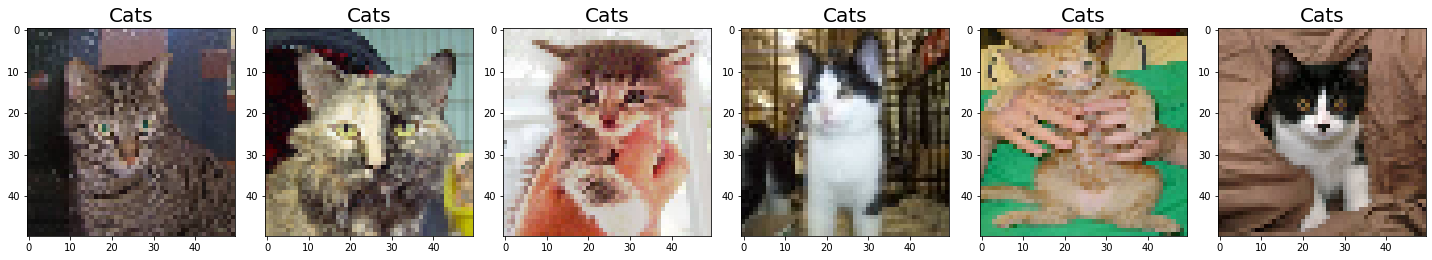

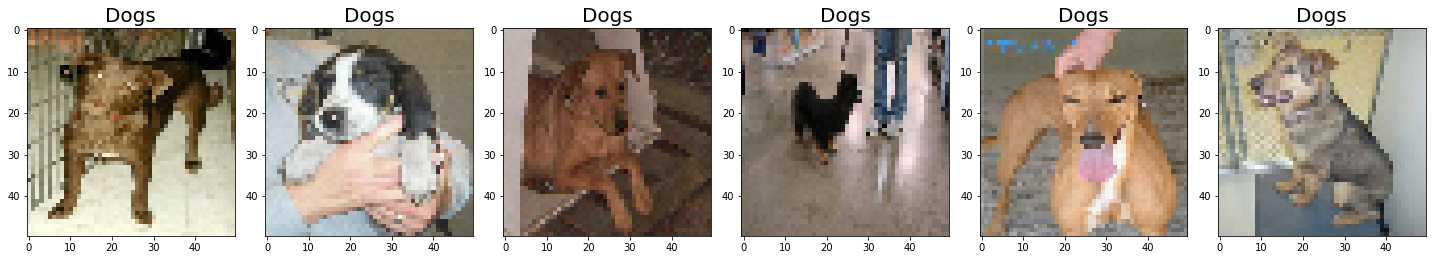

In [3]:
# visualize animals
def ShowFirstSix(images_arr,title):

    fig, axes = plt.subplots(1, 6, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstSix(cats,'Cats')
ShowFirstSix(dogs,'Dogs')

In [4]:
# randomly shuffle cell image list and their labels
def reorder(old_list,order):
    new_list=[]
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices=np.arange(len(animal_labels))
indices=indices.tolist()
animal_labels=reorder(animal_labels,indices)
animal_images=reorder(animal_images,indices)

#we change it to arrays
image_array=np.array(animal_images)
label_array=np.array(animal_labels)

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(image_array,label_array,test_size=0.20,random_state=42)

In [6]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=len(ytest),random_state=42)

In [7]:
print('size of train dataset {}'.format((xtrain.shape[0])))
print('size of test dataset {}'.format((xtest.shape[0])))
print('size of validation dataset {}'.format((xval.shape[0])))

size of train dataset 4803
size of test dataset 1601
size of validation dataset 1601


In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow(xtrain, ytrain, batch_size = 128, shuffle = False)
val_generator = val_datagen.flow(xtest, ytest, batch_size = 128, shuffle = False)

In [9]:
def create_model():
    model=Sequential()
    
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(50,50,3),padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [10]:
model=create_model()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator, epochs=100,validation_data=val_generator,verbose=1)
model.summary()

Epoch 1/100
38/38 [==============================] - 67s 2s/step - loss: 1.1922 - accuracy: 0.5430 - val_loss: 0.6696 - val_accuracy: 0.4884
Epoch 2/100
38/38 [==============================] - 45s 1s/step - loss: 0.8945 - accuracy: 0.5665 - val_loss: 0.6663 - val_accuracy: 0.4884
Epoch 3/100
38/38 [==============================] - 48s 1s/step - loss: 0.6674 - accuracy: 0.5982 - val_loss: 0.6755 - val_accuracy: 0.4884
Epoch 4/100
38/38 [==============================] - 58s 2s/step - loss: 0.6523 - accuracy: 0.6179 - val_loss: 0.7251 - val_accuracy: 0.4884
Epoch 5/100
38/38 [==============================] - 49s 1s/step - loss: 0.6477 - accuracy: 0.6144 - val_loss: 0.8832 - val_accuracy: 0.4884
Epoch 6/100
38/38 [==============================] - 46s 1s/step - loss: 0.6445 - accuracy: 0.6182 - val_loss: 1.0869 - val_accuracy: 0.4884
Epoch 7/100
38/38 [==============================] - 46s 1s/step - loss: 0.6346 - accuracy: 0.6396 - val_loss: 1.1177 - val_accuracy: 0.4884
Epoch 8/100
3

Epoch 59/100
38/38 [==============================] - 42s 1s/step - loss: 0.4814 - accuracy: 0.7639 - val_loss: 2.8457 - val_accuracy: 0.4884
Epoch 60/100
38/38 [==============================] - 44s 1s/step - loss: 0.4774 - accuracy: 0.7749 - val_loss: 1.3462 - val_accuracy: 0.5128
Epoch 61/100
38/38 [==============================] - 42s 1s/step - loss: 0.4617 - accuracy: 0.7747 - val_loss: 3.6502 - val_accuracy: 0.5116
Epoch 62/100
38/38 [==============================] - 43s 1s/step - loss: 0.4737 - accuracy: 0.7674 - val_loss: 0.6975 - val_accuracy: 0.5871
Epoch 63/100
38/38 [==============================] - 43s 1s/step - loss: 0.4771 - accuracy: 0.7622 - val_loss: 0.8114 - val_accuracy: 0.5022
Epoch 64/100
38/38 [==============================] - 50s 1s/step - loss: 0.4647 - accuracy: 0.7764 - val_loss: 2.8178 - val_accuracy: 0.5116
Epoch 65/100
38/38 [==============================] - 47s 1s/step - loss: 0.4679 - accuracy: 0.7716 - val_loss: 4.2631 - val_accuracy: 0.5116
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

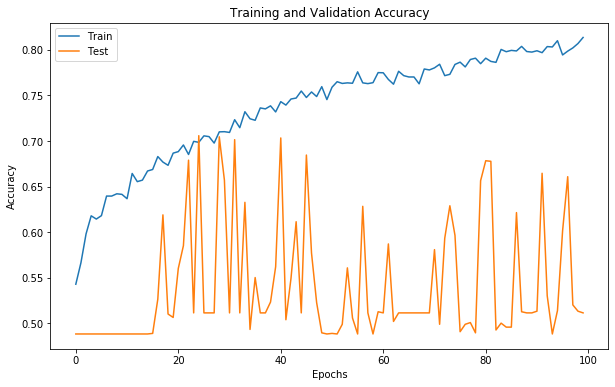

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show

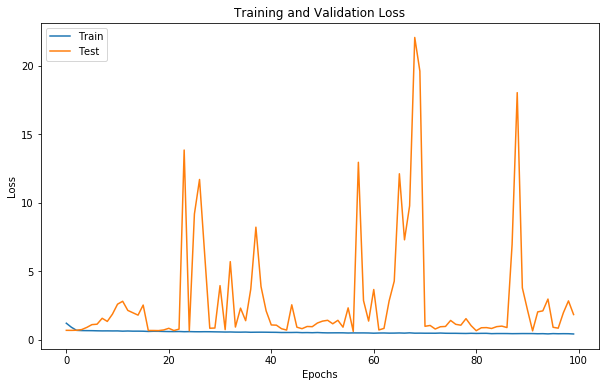

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()